In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import clear_output

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


### Read and load dataset

In [2]:
df = pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Data Cleaning:
## Delete Redundant columns

In [4]:
df.drop(['phone','url','reviews_list','address',"listed_in(type)","listed_in(city)"],inplace=True,axis=1)

In [5]:
df.drop("menu_item",inplace=True,axis=1)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600


## Renaming the columns

In [7]:
df.rename(columns={"approx_cost(for two people)":"cost_for_two","rest_type":"r_type"},inplace=True)

## Dropping Dups

In [8]:
# check for the duplicates
df.duplicated().sum()

28641

In [9]:
# drop the duplicate values
df.drop_duplicates(inplace=True)

## Cleaning individual columns

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 0, '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df['Rate'] = rate1 = df['rate'].str.extract(r'^(\d{1}\.\d{1})', expand=False)  # expand suggest to return the result as series rather than a dataframe

In [14]:
df.drop("rate",inplace=True,axis=1)

In [15]:
df.head()

,name,online_order,book_table,votes,location,r_type,dish_liked,cuisines,cost_for_two,Rate
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,4.1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,4.1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,3.8
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,3.7
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,3.8


In [16]:
df.r_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [17]:
df = df.assign(r_type=df.r_type.str.split(", ")) #the code is splitting the values in the 'r_type' column by commas and creating a new column 'r_type' in the DataFrame 'df' with the split values stored as lists.

In [18]:
df = df.assign(dish_liked=df.dish_liked.str.split(", "))
df = df.assign(cuisines=df.cuisines.str.split(", "))

In [19]:
df = df.explode('dish_liked')
df = df.explode('cuisines')

In [20]:
df.head(5)

,name,online_order,book_table,votes,location,r_type,dish_liked,cuisines,cost_for_two,Rate
0,Jalsa,Yes,Yes,775,Banashankari,[Casual Dining],Pasta,North Indian,800,4.1
0,Jalsa,Yes,Yes,775,Banashankari,[Casual Dining],Pasta,Mughlai,800,4.1
0,Jalsa,Yes,Yes,775,Banashankari,[Casual Dining],Pasta,Chinese,800,4.1
0,Jalsa,Yes,Yes,775,Banashankari,[Casual Dining],Lunch Buffet,North Indian,800,4.1
0,Jalsa,Yes,Yes,775,Banashankari,[Casual Dining],Lunch Buffet,Mughlai,800,4.1


In [21]:
df['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [22]:
# there are some garbage values present in the restaurant name
df['name'].unique()[7280:7330]

array(["CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Mor'ish",
       'Hunger Lust', 'Srinivasa Mess', "Sri Venkatesha Iyengar's Bakery",
       'Bake Land', 'Bakewalk', "Head's Or Tail's", 'Al Manar',
       'Royal Streak Foods', "Kshatriya's Biriyani House",
       'Royal India Kabab Corner', 'Madurai Cafe',
       'Santrupti Uttara Karnataka Food Store',
       'La Brasserie - Le Meridien',
       'b CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© - Shangri-La Hotel',
       "Pepper's - The Palladium", 'La Boulangerie - Le Meridien',
       'Spice Cove - I.V Sanctum',
       'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Felix',
       'CafÃ\x83

In [23]:
# replace the garbage string pattern with null
df['name'].replace(r'[Ã\x83]|[Â\x82]|[\x92]+','',regex=True,inplace=True)

In [24]:
df['name'].unique()[7280:7330]

array(["Head's Or Tail's", 'Al Manar', 'Royal Streak Foods',
       "Kshatriya's Biriyani House", 'Royal India Kabab Corner',
       'Madurai Cafe', 'Santrupti Uttara Karnataka Food Store',
       'La Brasserie - Le Meridien', 'b Caf© - Shangri-La Hotel',
       "Pepper's - The Palladium", 'La Boulangerie - Le Meridien',
       'Spice Cove - I.V Sanctum', 'The Lobby Lounge - Shangri-La Hotel',
       "Gullu's Chat", 'Sagar', 'Bombay Vada Pav Corner', "Quickie's",
       'Tasty Paradise', 'Cafe Frying Wagon', 'Patiala Lassi',
       'B Bhagat Tarachand', 'The Golden Metro',
       'Sri Basaveshwara U.K Foods', 'North Indian Food', '37 China Town',
       'Dakshin', 'Chicken County', 'Annapoorni Grand',
       'RR Real Taste Of Bengaluru', 'RR Taste Of Bangalore',
       'Mantap Ice Cream', 'Shree Sagar Veg Fast Food',
       'New Prince Restaurant', 'Kesar Rasoi', 'Santosh Juice Junction',
       'Sri Mahalakshmi Hotel', 'Banaras Sweet House',
       'Sri Sapthagiri Sweets', 'Daivik', '

In [25]:
df = df.explode("r_type")
df['r_type'].head(5)

0    Casual Dining
0    Casual Dining
0    Casual Dining
0    Casual Dining
0    Casual Dining
Name: r_type, dtype: object

In [26]:
df['r_type'].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', nan, 'Dhaba',
       'Club', 'Irani Cafee', 'Bhojanalya', 'Pop Up', 'Meat Shop'],
      dtype=object)

In [27]:
df['cost_for_two'] = df['cost_for_two'].str.replace(r',', '', regex = True)

In [28]:
df['Rate'] = pd.to_numeric(df['Rate'])
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'])

In [29]:
# check for the duplicates
df.duplicated().sum()

18786

In [30]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

## Remove the NaN values from the dataset

In [31]:
df.isnull().sum()

name                0
online_order        0
book_table          0
votes               0
location           11
r_type            417
dish_liked      24396
cuisines           30
cost_for_two      938
Rate             9349
dtype: int64

### Handling missing values in Location

In [32]:
df.loc[df['location'].isnull()]

,name,online_order,book_table,votes,location,r_type,dish_liked,cuisines,cost_for_two,Rate
1662,Papa Khan Rasoi,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
13693,Mohabbat Desi Restaurant,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
16351,Desi Chatkara,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
26432,New Taj Biryani Centre,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
26519,AB's - Absolute Barbecues,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
27672,Manchow,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
33457,La Lunch Box,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
40354,The Happy Vegetarian,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
40556,Risalo Restaurant,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
46586,The Cinema,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN


There are just 11 NaN values in the location and doesnt look like it has any important information, so drop it

In [33]:
df.dropna(subset=['location'],inplace=True)

### Handling missing values in Restaurant type

In [34]:
r_type_miss = df.loc[df['r_type'].isnull()]
r_type_miss.head(5)

,name,online_order,book_table,votes,location,r_type,dish_liked,cuisines,cost_for_two,Rate
999,Mughlai Kitchen,Yes,No,269,BTM,NaN,Momos,Mughlai,600.0,3.5
999,Mughlai Kitchen,Yes,No,269,BTM,NaN,Momos,North Indian,600.0,3.5
999,Mughlai Kitchen,Yes,No,269,BTM,NaN,Momos,Chinese,600.0,3.5
999,Mughlai Kitchen,Yes,No,269,BTM,NaN,Momos,Momos,600.0,3.5
999,Mughlai Kitchen,Yes,No,269,BTM,NaN,Oreo Shake,Mughlai,600.0,3.5


We can fill the missing value of a row by identifying the type of cuisines it serve

In [35]:
group = r_type_miss.groupby('name')['cuisines'].unique()
group.head(7)

name
7 Star Biryani                                                        [Biryani]
Ali Bhai- Rolls and Kebabs                       [Rolls, North Indian, Mughlai]
Ammi's Biryani                                          [Biryani, North Indian]
Ana's Midnight Cafe                                         [Fast Food, Juices]
Awadh Biryani                                                  [Biryani, Kebab]
Babas Kitchen                                           [Chinese, North Indian]
Bawarchi Restaurant           [Biryani, North Indian, Chinese, Rolls, Bevera...
Name: cuisines, dtype: object

In [36]:
df.duplicated().sum()

0

In [37]:
df.dropna(inplace=True)

# DATA VISUALIZATION

In [38]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Restaurants delivering Online or not

In [39]:
agg_data = df.groupby('online_order')['name'].nunique()
agg_data

online_order
No     1229
Yes    2097
Name: name, dtype: int64

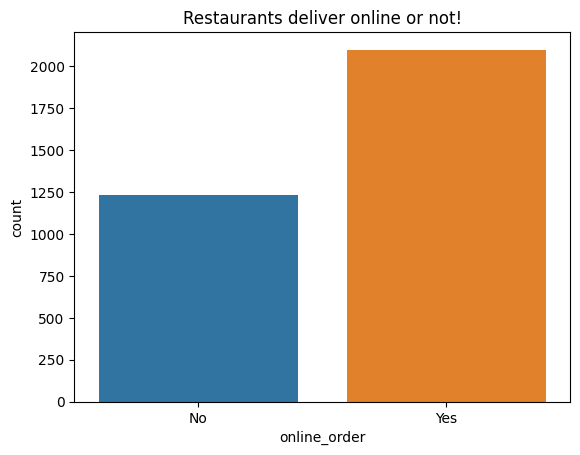

In [40]:
sns.barplot(x=agg_data.index,y=agg_data.values)
plt.xlabel('online_order')
plt.ylabel('count')
plt.title("Restaurants deliver online or not!")
plt.show()

From the above graph we can infer that majority of restaurants do not deliver online

[Text(0, 0, '20102'),
 Text(0, 0, '16456'),
 Text(0, 0, '11778'),
 Text(0, 0, '9768'),
 Text(0, 0, '9345'),
 Text(0, 0, '8968'),
 Text(0, 0, '8626'),
 Text(0, 0, '6880'),
 Text(0, 0, '6379'),
 Text(0, 0, '5629')]

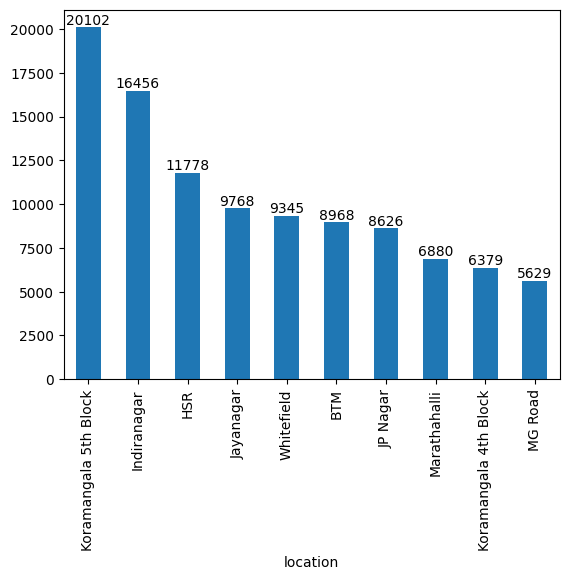

In [41]:
dff = df.groupby('location')['Rate'].count().sort_values(ascending=False).head(10)
a = dff.plot(kind="bar")
plt.bar_label(a.containers[0])


### Restaurants allowing table booking or not

In [42]:
agg_data = df.groupby('book_table')['name'].nunique()
agg_data

book_table
No     2458
Yes     754
Name: name, dtype: int64

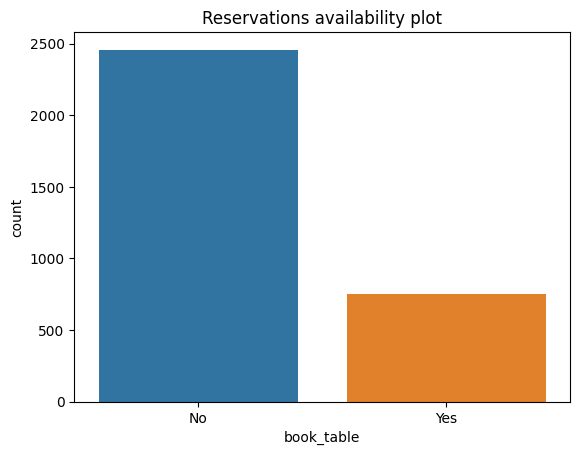

In [43]:
sns.barplot(x=agg_data.index,y=agg_data.values)
plt.xlabel('book_table')
plt.ylabel('count')
plt.title("Reservations availability plot")
plt.show()

Majority of the restaurants do not provide table booking

### Table booking Rate vs Rate

In [44]:
data = df.groupby(['book_table','Rate'])['name'].nunique()
data = data.reset_index()
data = pd.DataFrame(data)

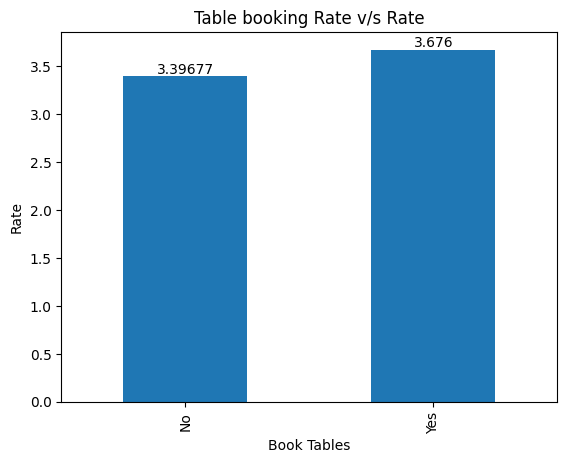

In [45]:
comparision = data.groupby('book_table')['Rate'].mean()
a = comparision.plot(kind="bar")
plt.bar_label(a.containers[0])  #a.containers[0] to access the container object of the bars. Then, plt.bar_label() is called with the container object to automatically add the value labels to each bar.
plt.xlabel("Book Tables")
plt.ylabel("Rate")
plt.title("Table booking Rate v/s Rate")
plt.show()

From the above graph we can infer that the cost of table booking restaurants are higher

### Best Location

In [46]:
data = df.groupby("location")['name'].nunique().head().sort_values(ascending=False)
data

location
BTM                  191
Bannerghatta Road    129
Banashankari         100
Basavanagudi          80
Banaswadi             58
Name: name, dtype: int64

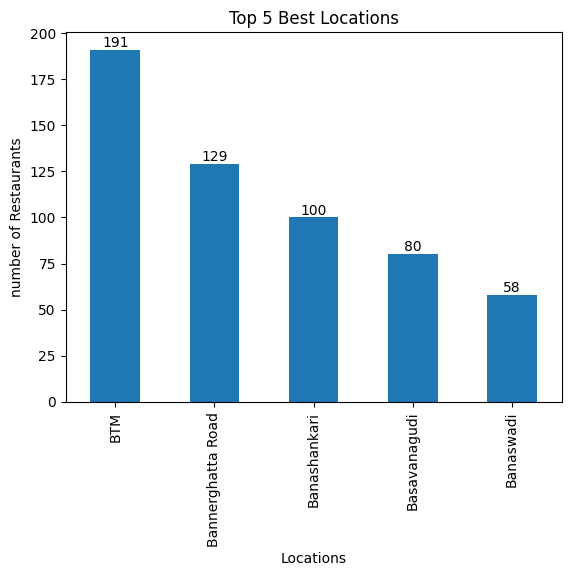

In [47]:
d = data.plot(kind="bar")
plt.bar_label(d.containers[0])
plt.xlabel("Locations")
plt.ylabel("number of Restaurants")
plt.title("Top 5 Best Locations")

plt.show()

The location with most number of restanurants is BTM

### Relation between Location and Rating

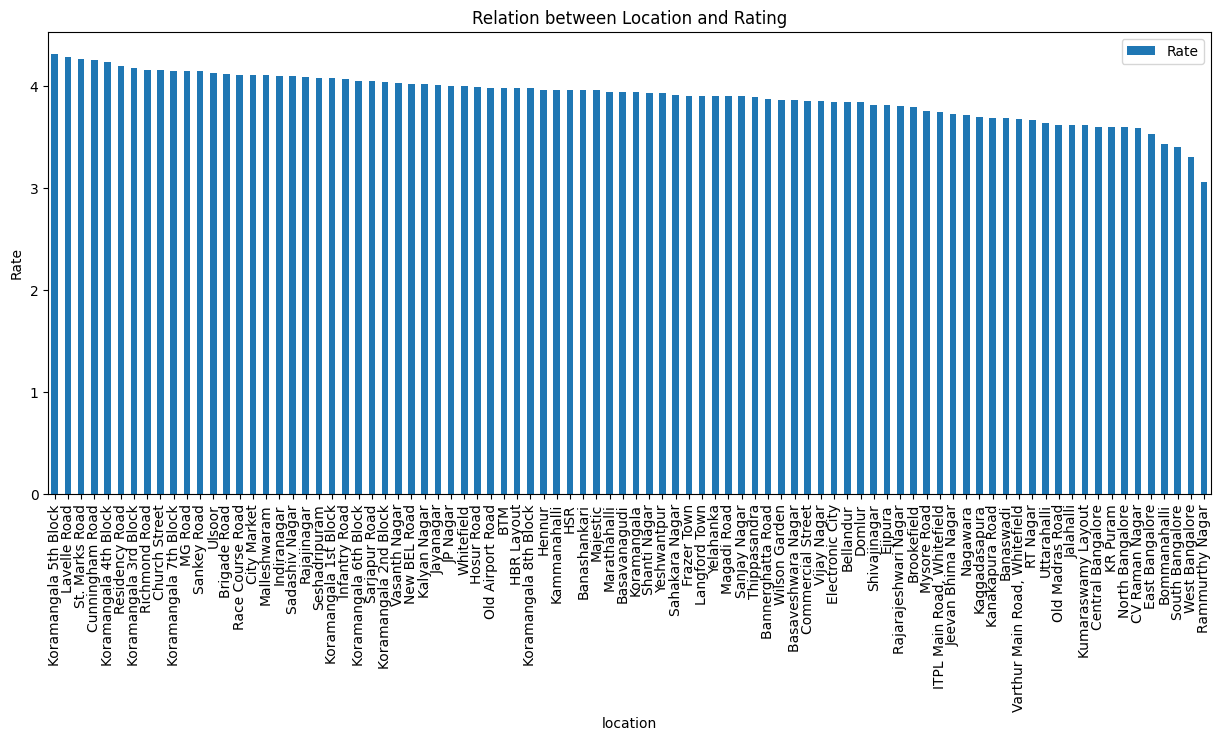

In [48]:
#try line plot instead
data = df.groupby('location').agg({'name':"unique","Rate":"mean"}).sort_values("Rate",ascending=False)
fig, ax = plt.subplots(figsize=(15,6))
data.plot(kind="bar",ax=ax)
plt.ylabel("Rate")
plt.title("Relation between Location and Rating")
plt.show()

From the above graph we can infer that Lavelle Road has highest rating

### Restaurant Type

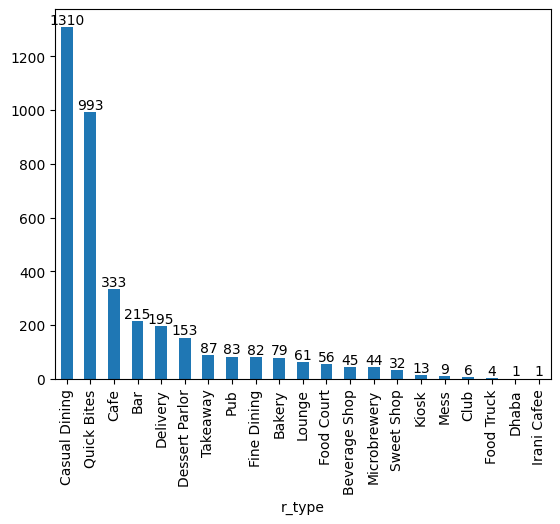

In [49]:
data = df.groupby("r_type")['name'].nunique().sort_values(ascending=False)
d = data.plot(kind="bar")
plt.bar_label(d.containers[0])
plt.show()

Majority of the restaurants serve Quick Bites

### Gaussian Rest type and Rating

In [50]:
data = df.groupby('r_type').agg({"name":"nunique","Rate":"mean"}).sort_values("Rate",ascending=False)
data.head()

,name,Rate
r_type,,
Microbrewery,44,4.417113
Irani Cafee,1,4.412500
Bar,215,4.256064
Fine Dining,82,4.247589
Pub,83,4.226709


<AxesSubplot: xlabel='Rate', ylabel='Density'>

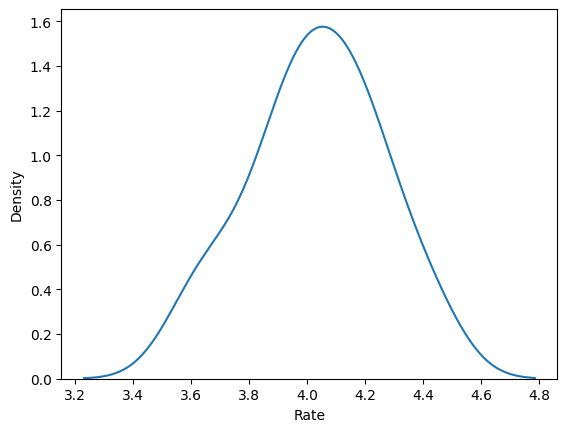

In [51]:
sns.kdeplot(data['Rate'])

## Types of Services

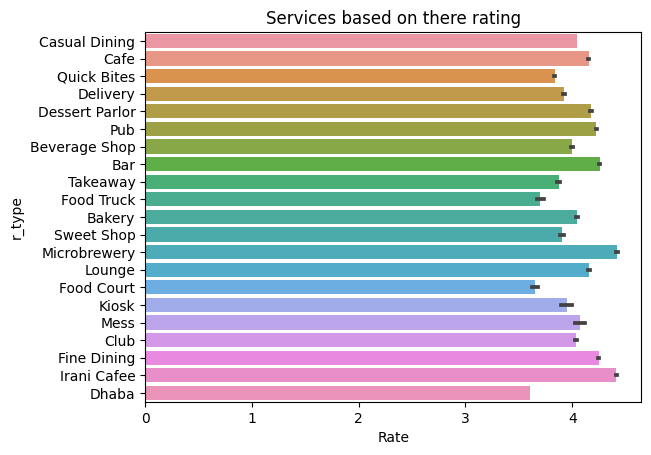

In [52]:
sns.barplot(x='Rate',y='r_type',data=df)
plt.title("Services based on there rating")
plt.show()

From the above graph we can infer that Irani Cafee is the most popular service provided by the restaurnts based on the ratings

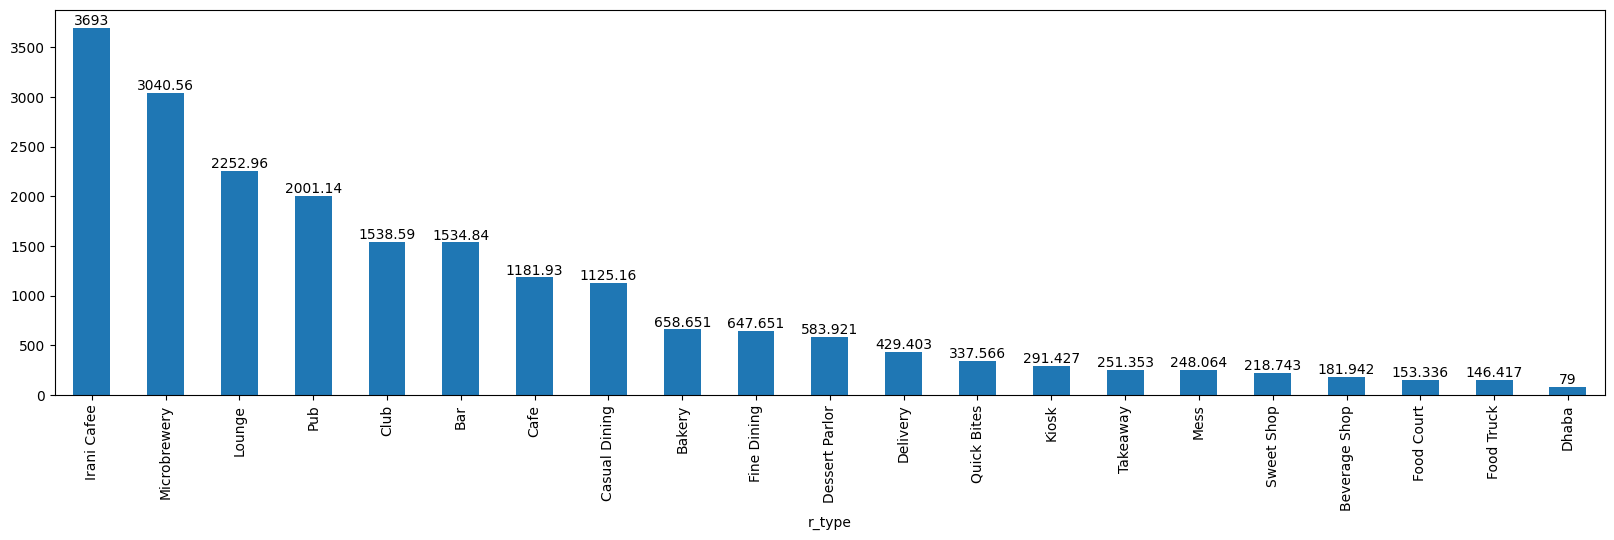

In [53]:
plt.figure(figsize=(20,5))
data = df.groupby('r_type')['votes'].mean().sort_values(ascending=False)
a = data.plot(kind='bar')
plt.bar_label(a.containers[0])
plt.show()

Fron the above graph we can infer that Irnani Cafee is the most popular type of Service offered based on the votes

## Cost of restaurants

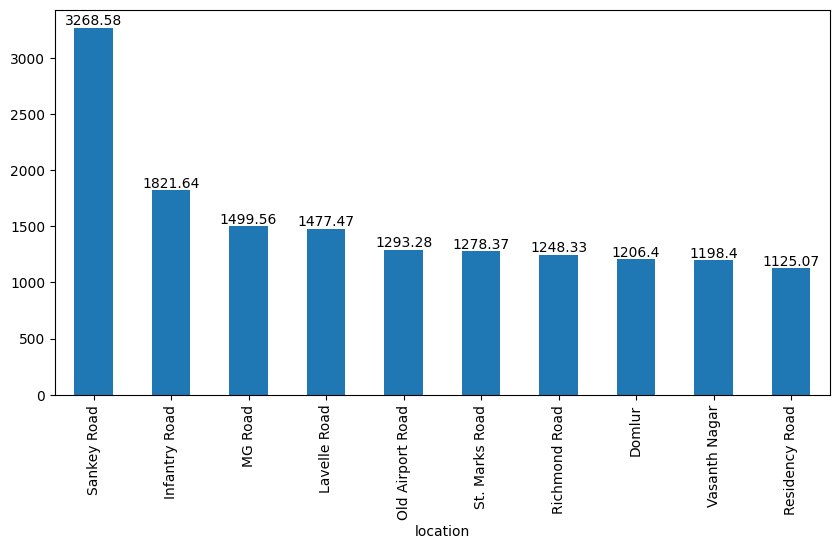

In [54]:
plt.figure(figsize=(10,5))
data = df.groupby('location')['cost_for_two'].mean().sort_values(ascending=False).head(10)
a = data.plot(kind = 'bar')
plt.bar_label(a.containers[0])
plt.show()

Sankey Rodd has the most expensive restaurants

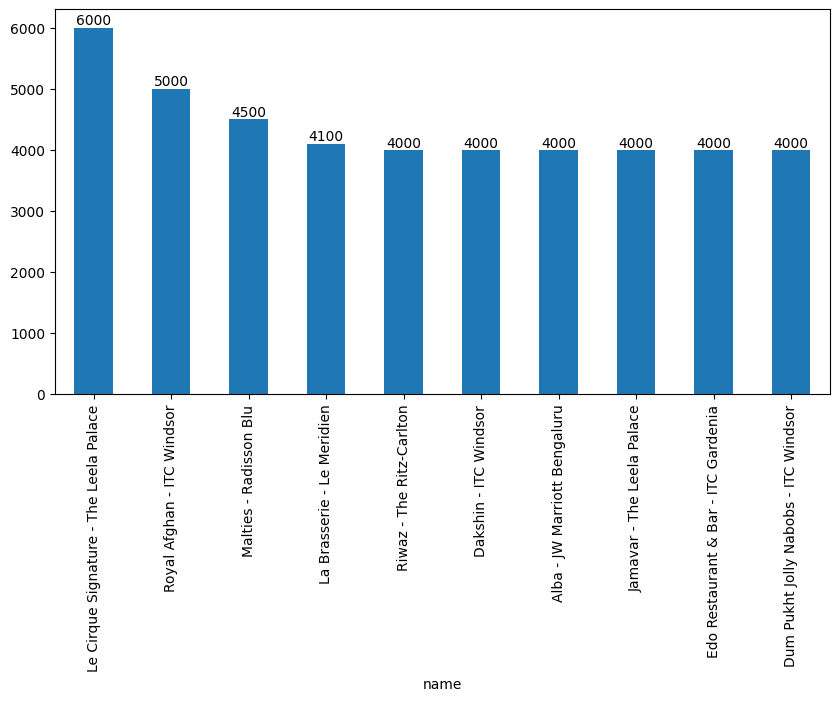

In [55]:
plt.figure(figsize=(10,5))
data = df.groupby('name')['cost_for_two'].mean().sort_values(ascending=False).head(10)
a = data.plot(kind = 'bar')
plt.bar_label(a.containers[0])
plt.show()

Le Cirque Signature - The Leela Palace is the most expensive restaurant with the cost of 3000 per person

## Number of Restaurants in a location

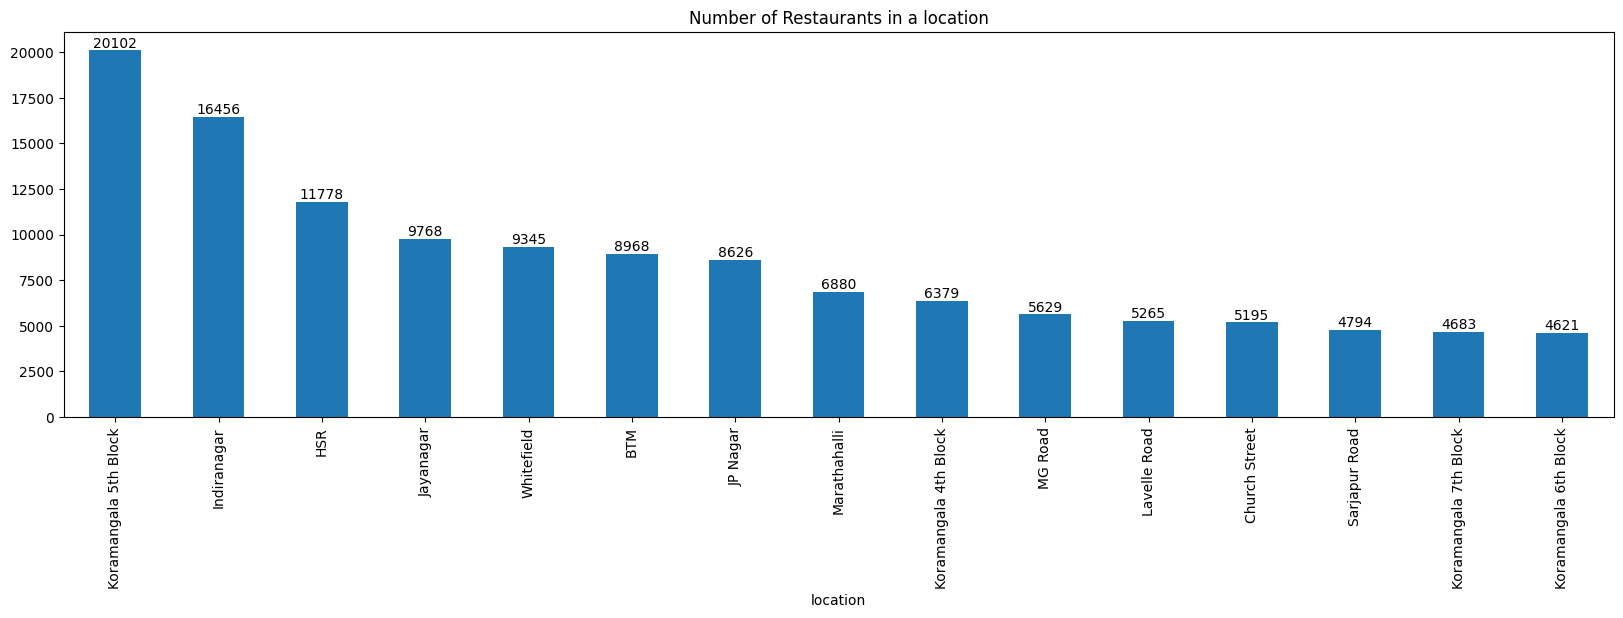

In [56]:
plt.figure(figsize=(20,5))
data = df.groupby('location')['name'].count().sort_values(ascending=False).head(15)
a = data.plot(kind='bar')
plt.bar_label(a.containers[0])
plt.title('Number of Restaurants in a location')
plt.show()

Above graph shows top 15 locations with most of the restaurants

## Most Famous Restaurant chains in Bengaluru

In [57]:
df_bangalore = df.loc[df['location'].isin(['East Bangalore','South Bangalore','North Banglore','Central Bangalore','West Bangalore'])]
df_bangalore.head(5)

,name,online_order,book_table,votes,location,r_type,dish_liked,cuisines,cost_for_two,Rate
355,As On Fire,Yes,No,41,South Bangalore,Food Truck,Pizza,Pizza,400.0,3.5
355,As On Fire,Yes,No,41,South Bangalore,Food Truck,Pizza,Fast Food,400.0,3.5
355,As On Fire,Yes,No,41,South Bangalore,Food Truck,Pizza,BBQ,400.0,3.5
830,Belly Squad Food Truck,No,No,55,South Bangalore,Food Truck,Biryani,Chinese,300.0,3.8
830,Belly Squad Food Truck,No,No,55,South Bangalore,Food Truck,Biryani,Rolls,300.0,3.8


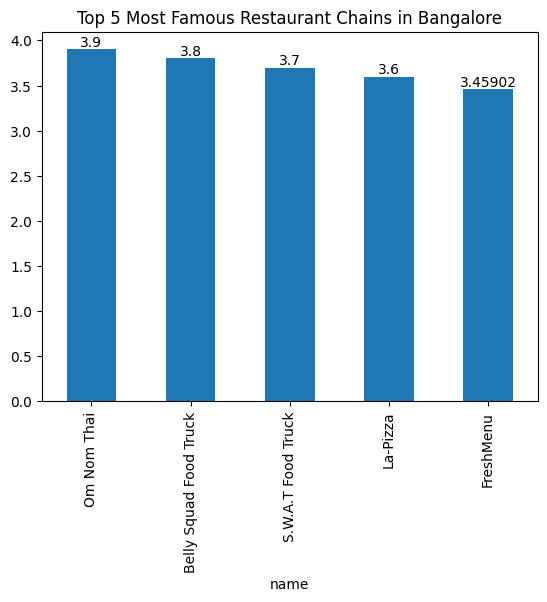

In [58]:
data = df_bangalore.groupby('name')['Rate'].mean().sort_values(ascending=False).head(5)
a = data.plot(kind='bar')
plt.bar_label(a.containers[0])
plt.title("Top 5 Most Famous Restaurant Chains in Bangalore")
plt.show()

The above graph shows top 5 most famous restaurants in Bangalore based on the Ratings

In [59]:
df.head(5)

,name,online_order,book_table,votes,location,r_type,dish_liked,cuisines,cost_for_two,Rate
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,Pasta,North Indian,800.0,4.1
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,Pasta,Mughlai,800.0,4.1
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,Pasta,Chinese,800.0,4.1
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,Lunch Buffet,North Indian,800.0,4.1
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,Lunch Buffet,Mughlai,800.0,4.1


## Analysis

In [162]:
def best_location():
    best_location = df.groupby('location').agg({'Rate':"mean","votes":'sum'}).reset_index()
    best_location = best_location.sort_values(by='Rate',ascending=False).head(5)

    plt.figure(figsize=(10,5))
    a = sns.barplot(data=best_location, x='location', y='Rate', palette='viridis')
    plt.bar_label(a.containers[0])
    plt.title('Top 5 Locations with the Highest Average Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Location')
    plt.show()
    
def popular_Restaurant_type(location):
    Rest_type_in_location = df[df['location'] == location]
    # Sort and display the popular Restaurant type in the selected location
    popular_restaurant_type = Rest_type_in_location.groupby('r_type')['Rate'].mean().sort_values(ascending=False)
    popular_restaurant_type_5 = popular_restaurant_type.head(5)
    unpopular_restaurant_type = popular_restaurant_type.tail(5)
    print(f"5 most Popular Restaurant type in {location}:")
    print(popular_restaurant_type_5,"\n")
    print(f"5 least Popular Restaurant type in {location}:")
    print(unpopular_restaurant_type,"\n")

    
def popular_cuisines(location):
    cuisines_in_location = df[df['location'] == location]
    # Sort and display the popular cuisines in the selected location
    popular_cuisines = cuisines_in_location.groupby("cuisines")['Rate'].mean().sort_values(ascending=False)
    popular_cuisines_5 = popular_cuisines.head(5)  # You can change '5' to show more or fewer popular cuisines
    unpopular_cuisines = popular_cuisines.tail(5)
    print(f"5 most Popular cuisines in {location}:")
    print(popular_cuisines_5,"\n")
    print(f"5 least Popular cuisines in {location}:")
    print(unpopular_cuisines,"\n")

def popular_dishes(location):
    #Popular dishes in the selected location
    dishes_liked_in_location = df[df['location'] == location]
    popular_dishes = dishes_liked_in_location['dish_liked'].value_counts()
    popular_dishes_5 = popular_dishes.head(5)
    unpopular_dishes = popular_dishes.tail(5)
    # Print the liked dishes in the selected location
    print(f"Dishes liked in {location}:")
    print(f"5 most liked dishes in{location}:")
    print(popular_dishes_5,"\n")
    print(f"5 least liked dishes in{location}:")
    print(unpopular_dishes,"\n")

def average_cost(location):
    #Average cost based of Restaurant type
    dishes_liked_in_location = df[df['location'] == location]
    average_cost =  dishes_liked_in_location.groupby('r_type')['cost_for_two'].mean()
    print(f'Average cost per person based on the restaurant type: {average_cost/2},"\n"')
    
def other_services(location):
    services = df[df['location'] == location]
    online_order_service = services['online_order'].value_counts()
    print(f"Frequency of Restaurants with online food delivery service in {location}")
    print(online_order_service,"\n")
    
    online_delivery = df[df['location'] == location]
    table_booking_service = online_delivery['book_table'].value_counts()
    print(f"Frequency of Restaurants with Table Booking service in {location}")
    print(table_booking_service,"\n")


In [ ]:
def new_restaurant():
    # Ideal location
    print("Top 5 best locations to Setup a Restaurant")
    best_location()
    location = input("Select your location")
    clear_output()
    
    while True:
    
        print("What do you wanna know?")
        option = input(f"1]Popular Restaurant type in {location}\n2] 5 most and least liked cuisines in {location}\n3] 5 most and least liked dishes in {location}\n4] Average cost per person in {location}\n5] Details about other services\n6] Exit\n")
        clear_output()

        if option == "1":
            #Popular restaurant type in the location
            popular_Restaurant_type(location)
            conn = input("Press 0 to continue")
            clear_output()

        elif option == "2":
            #Cuisines liked in the location
            popular_cuisines(location)
            conn = input("Press 0 to continue")
            clear_output()
            
        elif option == "3":
            # Dishes liked in that location
            popular_dishes(location)
            conn = input("Press 0 to continue")
            clear_output()
            
        elif option == "4":
            #Average cost per person
            average_cost(location)
            conn = input("Press 0 to continue")
            clear_output()

        elif option == "5":
            #other services
            other_services(location)
            conn = input("Press 0 to continue")
            clear_output()
        
        elif option == "6":
            print("Thank you")
            break
        
        else:
            print("Invalid Input, Try again!")
            
    

In [ ]:
def zomato():
    print("Welcome to Zomato")
    return new_restaurant()

In [181]:
zomato()

Thank you
